# Import Everything We Will Need

In [2]:
# Get functions from the common branch.
from common import load_image, show_image, load_data, split_data, validation_scores, merge_results

# Typical python imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns

# Generally used in SKLearn
from sklearn.pipeline import make_pipeline

# Data transformation functions
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Supervised Learning-related
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.svm import SVC

# Unsupervised Learning functions
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples

# Import Data, apply scalings

In [3]:
# Load data
df = load_data()

# Split data
X_train, X_test, y_train, y_test = split_data(df)

print(y_train)

# Preview shape of split data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train_stats = pd.DataFrame({'Mean':X_train.mean(), 'Std Dev':X_train.std(), 'Max':X_train.max(), 'Min':X_train.min()})
print(X_train_stats)

# Create Scalers, fit the training data to them, and transform it as well.
ss = StandardScaler()
mm = MinMaxScaler()
ss.fit(X_train)
mm.fit(X_train)
X_train_ss = pd.DataFrame(ss.transform(X_train))
X_train_mm = pd.DataFrame(mm.transform(X_train))

# Show stats for each dataset.
X_train_ss_stats = pd.DataFrame({'Mean':X_train_ss.mean(), 'Std Dev':X_train_ss.std(), 'Max':X_train_ss.max(), 'Min':X_train_ss.min()})
print(X_train_ss_stats)

X_train_mm_stats = pd.DataFrame({'Mean':X_train_mm.mean(), 'Std Dev':X_train_mm.std(), 'Max':X_train_mm.max(), 'Min':X_train_mm.min()})
print(X_train_mm_stats)

1615    1
3408    3
5225    0
1155    1
6402    2
       ..
4931    4
3264    3
1653    1
2607    2
2732    2
Name: class_index, Length: 5335, dtype: int64
(5335, 256) (5335,) (1334, 256) (1334,)
                 Mean   Std Dev       Max       Min
feature_0   -0.111037  1.220634  3.340879 -3.924360
feature_1   -0.259658  0.810009  2.774789 -2.864161
feature_2    0.336298  0.849993  4.222510 -1.956932
feature_3    0.258545  1.236256  5.090810 -3.164567
feature_4    0.101940  1.144379  4.590948 -3.885380
...               ...       ...       ...       ...
feature_251 -0.284108  0.880662  3.146019 -3.254388
feature_252 -0.625662  1.486854  3.593255 -5.949358
feature_253 -0.414734  1.126365  2.698546 -4.855778
feature_254  0.381650  1.123460  5.786407 -1.896450
feature_255  0.703538  1.746583  4.582082 -4.003998

[256 rows x 4 columns]
             Mean   Std Dev       Max       Min
0    2.064370e-17  1.000094  2.828235 -3.124343
1   -1.132074e-17  1.000094  3.746540 -3.215702
2   -1.99777

# Principal Component Analysis 

### Calculate and plot PCA of each individual transformed dataset. 

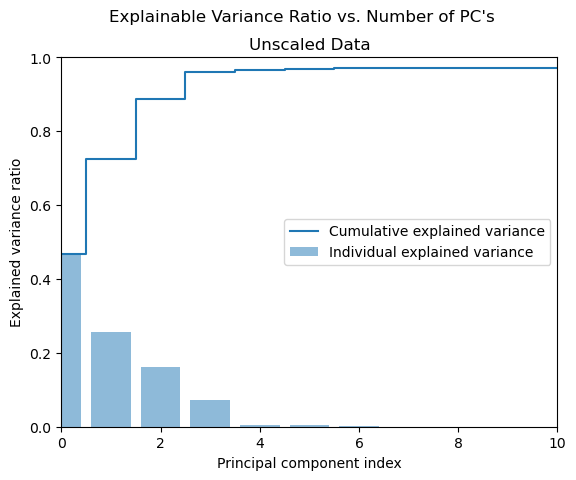

In [4]:
# Create a PCA for the unscaled data
pca_x = PCA()

# Fit the PCA
pca_x.fit(X_train)

# Get the EVR for each PC.
exp_var_pca_x = pca_x.explained_variance_ratio_

# Create the cumulative curve.
cum_sum_eigenvalues_x = np.cumsum(exp_var_pca_x)

# Plot it out.
plt.bar(range(0,len(exp_var_pca_x)), exp_var_pca_x, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_x)), cum_sum_eigenvalues_x, where='mid',label='Cumulative explained variance')
plt.suptitle("Explainable Variance Ratio vs. Number of PC's")
plt.title("Unscaled Data")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.axis([0, 10, 0, 1])
plt.show()


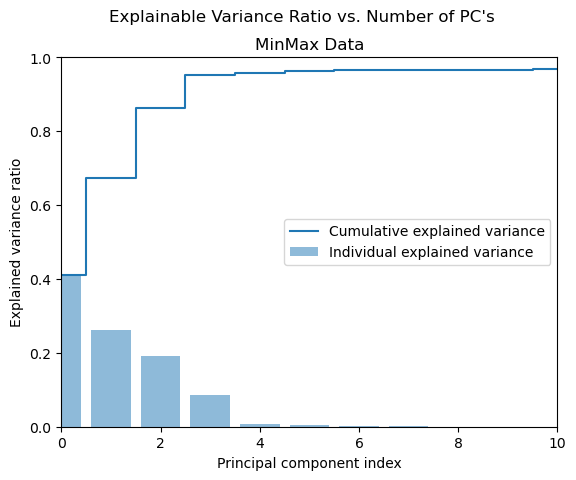

In [5]:
# Create a PCA for the minmax scaled data
pca_mm = PCA()

# Fit the PCA
pca_mm.fit(X_train_mm)

# Get the EVR for each PC.
exp_var_pca_mm = pca_mm.explained_variance_ratio_

# Create the cumulative curve.
cum_sum_eigenvalues_mm = np.cumsum(exp_var_pca_mm)

# Plot it out.
plt.bar(range(0,len(exp_var_pca_mm)), exp_var_pca_mm, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_mm)), cum_sum_eigenvalues_mm, where='mid',label='Cumulative explained variance')
plt.suptitle("Explainable Variance Ratio vs. Number of PC's")
plt.title("MinMax Data")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.axis([0, 10, 0, 1])
plt.show()


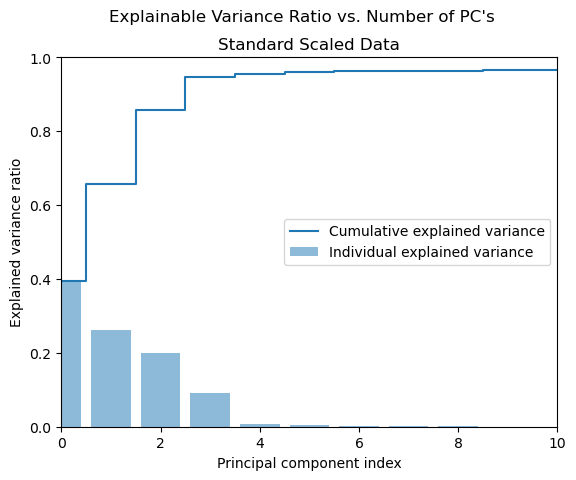

In [6]:
# Create a PCA for the standard scaled data
pca_ss = PCA()

# Fit the PCA
X_pca = pca_ss.fit_transform(X_train_ss)

# Get the EVR for each PC.
exp_var_pca_ss = pca_ss.explained_variance_ratio_

# Create the cumulative curve.
cum_sum_eigenvalues_ss = np.cumsum(exp_var_pca_ss)

# Plot it out.
plt.bar(range(0,len(exp_var_pca_ss)), exp_var_pca_ss, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_ss)), cum_sum_eigenvalues_ss, where='mid',label='Cumulative explained variance')
plt.suptitle("Explainable Variance Ratio vs. Number of PC's")
plt.title("Standard Scaled Data")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.axis([0, 10, 0, 1])
plt.show()


# Compare all of the PCA charts.

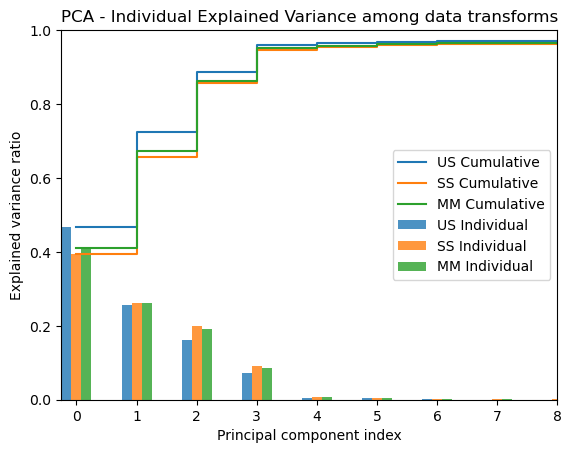

In [7]:
fig, ax = plt.subplots()

plot_data = pd.DataFrame({"US Individual":exp_var_pca_x, "SS Individual":exp_var_pca_ss, "MM Individual":exp_var_pca_mm})
plot_cum_data = pd.DataFrame({"US Cumulative":cum_sum_eigenvalues_x, "SS Cumulative ":cum_sum_eigenvalues_ss, "MM Cumulative":cum_sum_eigenvalues_mm})

plot_data.plot.bar(rot=0, alpha=0.8, ax=ax)
plot_cum_data.plot(drawstyle='steps-post', ax=ax)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.axis([-0.25, 8, 0, 1])
plt.legend(loc='right')
plt.title("PCA - Individual Explained Variance among data transforms")
plt.show()

# Transform data to 2 components for visualization

In [8]:
pca_us = PCA(n_components=2)
pca_ss = PCA(n_components=2)
pca_mm = PCA(n_components=2)

X_us_pca = pca_us.fit_transform(X_train)
X_ss_pca = pca_ss.fit_transform(X_train_ss)
X_mm_pca = pca_mm.fit_transform(X_train_mm)


# Plot unscaled data with labels for first two Principal Components

Text(0.5, 1.0, 'PCA n=2, Unscaled Data')

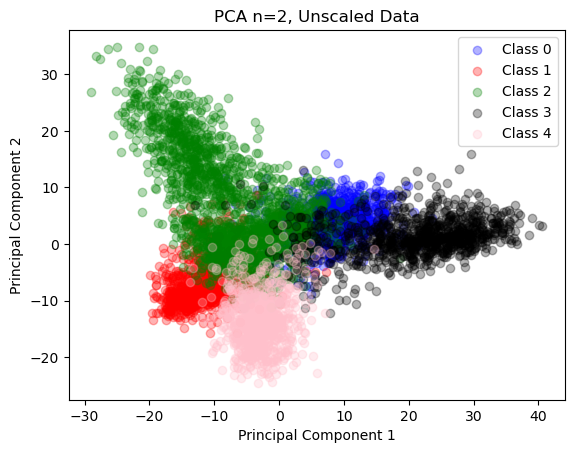

In [9]:
# Take all of the training data
Data_train = pd.concat([X_train, y_train], axis=1, join='inner')

# Grab training data by each class and output (without messing with sample order)
X_train_class0 = Data_train[Data_train['class_index'] == 0].drop(Data_train.columns[-1], axis=1)
X_train_class1 = Data_train[Data_train['class_index'] == 1].drop(Data_train.columns[-1], axis=1)
X_train_class2 = Data_train[Data_train['class_index'] == 2].drop(Data_train.columns[-1], axis=1)
X_train_class3 = Data_train[Data_train['class_index'] == 3].drop(Data_train.columns[-1], axis=1)
X_train_class4 = Data_train[Data_train['class_index'] == 4].drop(Data_train.columns[-1], axis=1)

# Transform all the data per the corresponding PCA (with two components)
X_us_pca_class0 = pca_us.transform(X_train_class0)
X_us_pca_class1 = pca_us.transform(X_train_class1)
X_us_pca_class2 = pca_us.transform(X_train_class2)
X_us_pca_class3 = pca_us.transform(X_train_class3)
X_us_pca_class4 = pca_us.transform(X_train_class4)

# Plot each individual sample's top 2 PC's.  Show the class as well. 
plt.scatter(X_us_pca_class0.T[0], X_us_pca_class0.T[1], alpha=0.3, color='blue', label='Class 0')
plt.scatter(X_us_pca_class1.T[0], X_us_pca_class1.T[1], alpha=0.3,  color='red', label='Class 1')
plt.scatter(X_us_pca_class2.T[0], X_us_pca_class2.T[1], alpha=0.3,  color='green', label='Class 2')
plt.scatter(X_us_pca_class3.T[0], X_us_pca_class3.T[1], alpha=0.3,  color='black', label='Class 3')
plt.scatter(X_us_pca_class4.T[0], X_us_pca_class4.T[1], alpha=0.3,  color='pink', label='Class 4')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA n=2, Unscaled Data')

## Try KMeans Clustering on Unscaled data

In [10]:
# Combine all Unscaled data 
X_us_pca_all = np.vstack((X_us_pca_class0, X_us_pca_class1, X_us_pca_class2, X_us_pca_class3, X_us_pca_class4))
print(X_us_pca_all.shape)

kmeans_us = KMeans(n_clusters=5)
kmeans_us.fit(X_train)
y_us_pca_kmeans_pred = kmeans_us.predict(X_train)
print(y_us_pca_kmeans_pred.shape)

cluster_us_df = pd.DataFrame({'PC1':X_us_pca_all.T[0], 'PC2':X_us_pca_all.T[1], 'Label':y_us_pca_kmeans_pred})
print(cluster_us_df)

(5335, 2)


C:\Users\nicol\anaconda3\envs\CSE532\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(5335,)
            PC1        PC2  Label
0     11.259555   3.287163      1
1      2.574192   3.823528      2
2      9.932847   1.981130      4
3      7.083772   4.621189      1
4      8.609752   7.818023      1
...         ...        ...    ...
5330  -0.608497 -16.884025      3
5331  -3.287404 -12.960884      2
5332   0.491682 -18.952132      1
5333  -3.425006 -16.460754      0
5334  -2.979984  -9.817700      0

[5335 rows x 3 columns]


Text(0.5, 1.0, 'PCA n=2, Standard Scaler')

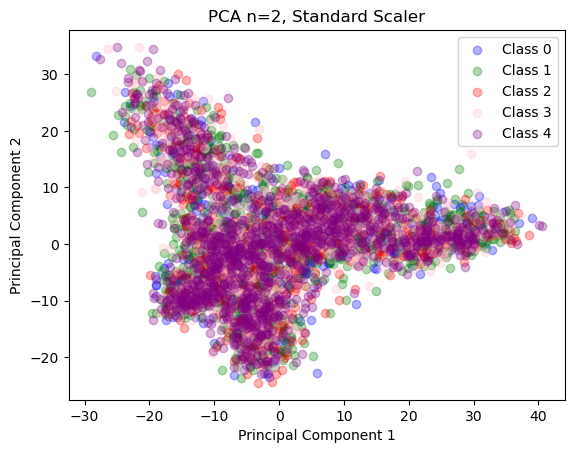

In [11]:
cluster_us_df_lab0 = cluster_us_df[cluster_us_df['Label'] == 0]
cluster_us_df_lab1 = cluster_us_df[cluster_us_df['Label'] == 1]
cluster_us_df_lab2 = cluster_us_df[cluster_us_df['Label'] == 2]
cluster_us_df_lab3 = cluster_us_df[cluster_us_df['Label'] == 3]
cluster_us_df_lab4 = cluster_us_df[cluster_us_df['Label'] == 4]
# cluster_us_df_lab5 = cluster_us_df[cluster_us_df['Label'] == 5]
# cluster_us_df_lab6 = cluster_us_df[cluster_us_df['Label'] == 6]
# cluster_us_df_lab7 = cluster_us_df[cluster_us_df['Label'] == 7]
# cluster_us_df_lab8 = cluster_us_df[cluster_us_df['Label'] == 8]
# cluster_us_df_lab9 = cluster_us_df[cluster_us_df['Label'] == 9]


plt.scatter(cluster_us_df_lab0.PC1, cluster_us_df_lab0.PC2, alpha=0.3, color='blue', label='Class 0')
plt.scatter(cluster_us_df_lab1.PC1, cluster_us_df_lab1.PC2, alpha=0.3, color='green', label='Class 1')
plt.scatter(cluster_us_df_lab2.PC1, cluster_us_df_lab2.PC2, alpha=0.3, color='red', label='Class 2')
plt.scatter(cluster_us_df_lab3.PC1, cluster_us_df_lab3.PC2, alpha=0.3, color='pink', label='Class 3')
plt.scatter(cluster_us_df_lab4.PC1, cluster_us_df_lab4.PC2, alpha=0.3, color='purple', label='Class 4')
# plt.scatter(cluster_us_df_lab5.PC1, cluster_us_df_lab5.PC2, alpha=0.3, color='orange', label='Class 5')
# plt.scatter(cluster_us_df_lab6.PC1, cluster_us_df_lab6.PC2, alpha=0.3, color='cyan', label='Class 6')
# plt.scatter(cluster_us_df_lab7.PC1, cluster_us_df_lab7.PC2, alpha=0.3, color='magenta', label='Class 7')
# plt.scatter(cluster_us_df_lab8.PC1, cluster_us_df_lab8.PC2, alpha=0.3, color='black', label='Class 8')
# plt.scatter(cluster_us_df_lab9.PC1, cluster_us_df_lab9.PC2, alpha=0.3, color='gray', label='Class 9')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA n=2, Standard Scaler')

Text(0.5, 1.0, 'PCA n=2, Standard Scaler')

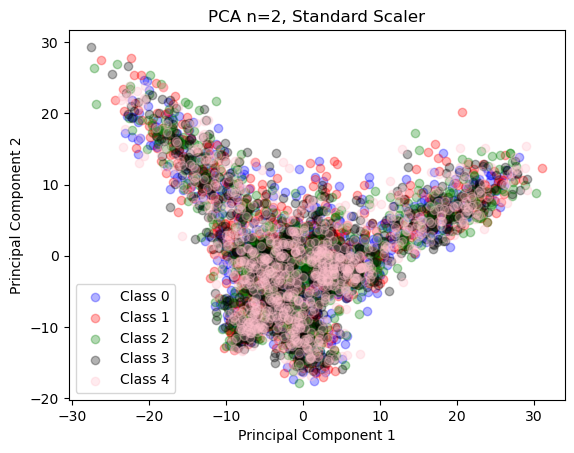

In [12]:
# Take all of the STANDARD SCALED training data
Data_train_ss = pd.concat([X_train_ss, y_train], axis=1, join='inner')

# Grab training data by each class and output (without messing with sample order)
X_train_ss_class0 = Data_train_ss[Data_train_ss['class_index'] == 0].drop(Data_train_ss.columns[-1], axis=1)
X_train_ss_class1 = Data_train_ss[Data_train_ss['class_index'] == 1].drop(Data_train_ss.columns[-1], axis=1)
X_train_ss_class2 = Data_train_ss[Data_train_ss['class_index'] == 2].drop(Data_train_ss.columns[-1], axis=1)
X_train_ss_class3 = Data_train_ss[Data_train_ss['class_index'] == 3].drop(Data_train_ss.columns[-1], axis=1)
X_train_ss_class4 = Data_train_ss[Data_train_ss['class_index'] == 4].drop(Data_train_ss.columns[-1], axis=1)

# Transform all the data per the corresponding PCA (with two components)
X_ss_pca_class0 = pca_ss.transform(X_train_ss_class0)
X_ss_pca_class1 = pca_ss.transform(X_train_ss_class1)
X_ss_pca_class2 = pca_ss.transform(X_train_ss_class2)
X_ss_pca_class3 = pca_ss.transform(X_train_ss_class3)
X_ss_pca_class4 = pca_ss.transform(X_train_ss_class4)

# Plot each individual sample's top 2 PC's.  Show the class as well. 
plt.scatter(X_ss_pca_class0.T[0], X_ss_pca_class0.T[1], alpha=0.3, color='blue', label='Class 0')
plt.scatter(X_ss_pca_class1.T[0], X_ss_pca_class1.T[1], alpha=0.3, color='red', label='Class 1')
plt.scatter(X_ss_pca_class2.T[0], X_ss_pca_class2.T[1], alpha=0.3, color='green', label='Class 2')
plt.scatter(X_ss_pca_class3.T[0], X_ss_pca_class3.T[1], alpha=0.3, color='black', label='Class 3')
plt.scatter(X_ss_pca_class4.T[0], X_ss_pca_class4.T[1], alpha=0.3, color='pink', label='Class 4')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA n=2, Standard Scaler')

Text(0.5, 1.0, 'PCA n=2, MinMax Scaler')

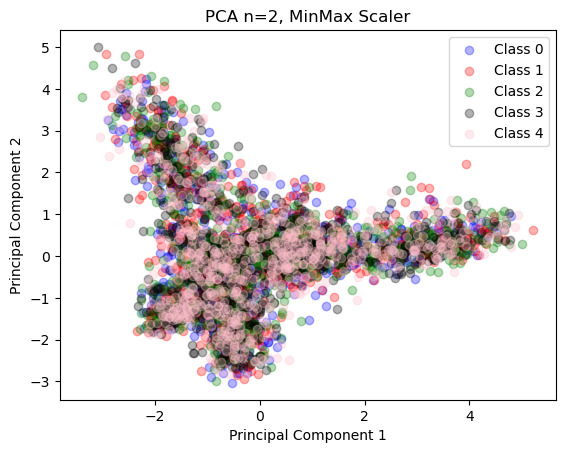

In [13]:
# Take all of the MinMax Scaled training data
Data_train_mm = pd.concat([X_train_mm, y_train], axis=1, join='inner')

# Grab training data by each class and output (without messing with sample order)
X_train_mm_class0 = Data_train_mm[Data_train_mm['class_index'] == 0].drop(Data_train_mm.columns[-1], axis=1)
X_train_mm_class1 = Data_train_mm[Data_train_mm['class_index'] == 1].drop(Data_train_mm.columns[-1], axis=1)
X_train_mm_class2 = Data_train_mm[Data_train_mm['class_index'] == 2].drop(Data_train_mm.columns[-1], axis=1)
X_train_mm_class3 = Data_train_mm[Data_train_mm['class_index'] == 3].drop(Data_train_mm.columns[-1], axis=1)
X_train_mm_class4 = Data_train_mm[Data_train_mm['class_index'] == 4].drop(Data_train_mm.columns[-1], axis=1)

# Transform all the data per the corresponding PCA (with two components)
X_mm_pca_class0 = pca_mm.transform(X_train_mm_class0)
X_mm_pca_class1 = pca_mm.transform(X_train_mm_class1)
X_mm_pca_class2 = pca_mm.transform(X_train_mm_class2)
X_mm_pca_class3 = pca_mm.transform(X_train_mm_class3)
X_mm_pca_class4 = pca_mm.transform(X_train_mm_class4)

# Plot each individual sample's top 2 PC's.  Show the class as well. 
plt.scatter(X_mm_pca_class0.T[0], X_mm_pca_class0.T[1], alpha=0.3, color='blue', label='Class 0')
plt.scatter(X_mm_pca_class1.T[0], X_mm_pca_class1.T[1], alpha=0.3, color='red', label='Class 1')
plt.scatter(X_mm_pca_class2.T[0], X_mm_pca_class2.T[1], alpha=0.3, color='green', label='Class 2')
plt.scatter(X_mm_pca_class3.T[0], X_mm_pca_class3.T[1], alpha=0.3, color='black', label='Class 3')
plt.scatter(X_mm_pca_class4.T[0], X_mm_pca_class4.T[1], alpha=0.3, color='pink', label='Class 4')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA n=2, MinMax Scaler')

In [14]:
# from sklearn.feature_selection import VarianceThreshold
# # Variance REALLY depends on scale of the data, so be careful!
# us_vt = VarianceThreshold(threshold=0)
# ss_vt = VarianceThreshold(threshold=0)
# mm_vt = VarianceThreshold(threshold=0)

# us_vt.fit(X_train)
# ss_vt.fit(X_train_ss)
# mm_vt.fit(X_train_mm)

# # X_train_vt = X_train.iloc[:, vt.get_support()]
# us_vt_df = pd.DataFrame({'Feature':X_train.columns, 'Variance':us_vt.variances_}).sort_values('Variance',ascending=True)
# ss_vt_df = pd.DataFrame({'Feature':X_train_ss.columns, 'Variance':ss_vt.variances_}).sort_values('Variance',ascending=True)
# mm_vt_df = pd.DataFrame({'Feature':X_train_mm.columns, 'Variance':mm_vt.variances_}).sort_values('Variance',ascending=True)

# print('Unscaled Data:')
# print(us_vt_df)
# print('\n\n---\n\n')
# print('Standard Scaled:')
# print(ss_vt_df)
# print('\n\n---\n\n')
# print('MinMax Scaled:')
# print(mm_vt_df)

# TSNE Analysis

In [15]:
tsne = TSNE(random_state=2)
us_tsne = tsne.fit_transform(X_train)

In [16]:
tsne = TSNE(random_state=2)
ss_tsne = tsne.fit_transform(X_train_ss)

In [17]:
tsne = TSNE(random_state=2)
mm_tsne = tsne.fit_transform(X_train_mm)

      us_tsne_one  us_tsne_two  class_index
0      -38.621506    -9.625768          0.0
1       46.332783    -4.675493          NaN
2       31.276087    13.979191          0.0
3      -61.771896   -15.017432          0.0
4       12.894372    -2.728920          0.0
...           ...          ...          ...
6216          NaN          NaN          2.0
6458          NaN          NaN          3.0
5924          NaN          NaN          2.0
5874          NaN          NaN          2.0
5827          NaN          NaN          2.0

[6409 rows x 3 columns]


C:\Users\nicol\AppData\Local\Temp\ipykernel_1812\2442238884.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


Text(0, 0.5, 'TSNE Feature 2')

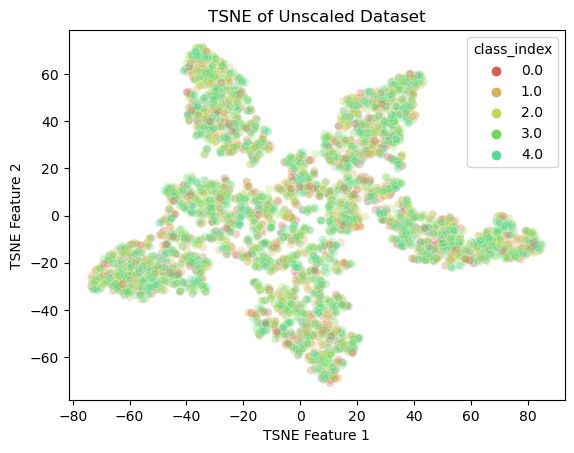

In [18]:
# Unscaled TSNE Plotting

df_us_tsne = pd.DataFrame({})
df_us_tsne['us_tsne_one'] = us_tsne[:,0]
df_us_tsne['us_tsne_two'] = us_tsne[:,1]
df_us_tsne = pd.concat([df_us_tsne, y_train], axis=1)
print(df_us_tsne)
sns.scatterplot(
    x="us_tsne_one", y="us_tsne_two",
    hue="class_index",
    palette=sns.color_palette("hls", 10),
    data=df_us_tsne,
    legend="full",
    alpha=0.3
)
plt.title("TSNE of Unscaled Dataset")
plt.xlabel("TSNE Feature 1")
plt.ylabel("TSNE Feature 2")

      ss_tsne_one  ss_tsne_two  class_index
0      -37.812073   -10.635941          0.0
1       34.038437    29.669851          NaN
2       29.887541     7.175922          0.0
3      -59.774921   -14.838121          0.0
4        5.410519    19.084290          0.0
...           ...          ...          ...
6216          NaN          NaN          2.0
6458          NaN          NaN          3.0
5924          NaN          NaN          2.0
5874          NaN          NaN          2.0
5827          NaN          NaN          2.0

[6409 rows x 3 columns]


C:\Users\nicol\AppData\Local\Temp\ipykernel_1812\1510190277.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


Text(0, 0.5, 'TSNE Feature 2')

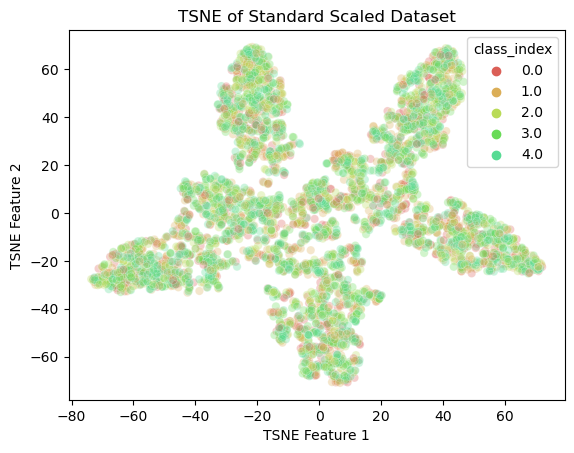

In [19]:
df_ss_tsne = pd.DataFrame({})
df_ss_tsne['ss_tsne_one'] = ss_tsne[:,0]
df_ss_tsne['ss_tsne_two'] = ss_tsne[:,1]
df_ss_tsne = pd.concat([df_ss_tsne, y_train], axis=1)
print(df_ss_tsne)
sns.scatterplot(
    x="ss_tsne_one", y="ss_tsne_two",
    hue="class_index",
    palette=sns.color_palette("hls", 10),
    data=df_ss_tsne,
    legend="full",
    alpha=0.3
)
plt.title("TSNE of Standard Scaled Dataset")
plt.xlabel("TSNE Feature 1")
plt.ylabel("TSNE Feature 2")

      mm_tsne_one  mm_tsne_two  class_index
0      -37.624207    -9.327662          0.0
1       45.253868    -4.576471          NaN
2       31.224705    11.718696          0.0
3      -58.827034   -11.476287          0.0
4       14.625928    -7.169748          0.0
...           ...          ...          ...
6216          NaN          NaN          2.0
6458          NaN          NaN          3.0
5924          NaN          NaN          2.0
5874          NaN          NaN          2.0
5827          NaN          NaN          2.0

[6409 rows x 3 columns]


C:\Users\nicol\AppData\Local\Temp\ipykernel_1812\2296767933.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


Text(0, 0.5, 'TSNE Feature 2')

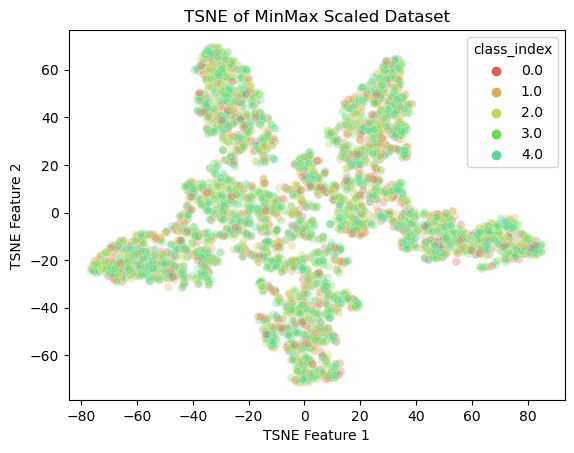

In [20]:
df_mm_tsne = pd.DataFrame({})
df_mm_tsne['mm_tsne_one'] = mm_tsne[:,0]
df_mm_tsne['mm_tsne_two'] = mm_tsne[:,1]
df_mm_tsne = pd.concat([df_mm_tsne, y_train], axis=1)
print(df_mm_tsne)
sns.scatterplot(
    x="mm_tsne_one", y="mm_tsne_two",
    hue="class_index",
    palette=sns.color_palette("hls", 10),
    data=df_mm_tsne,
    legend="full",
    alpha=0.3
)
plt.title("TSNE of MinMax Scaled Dataset")
plt.xlabel("TSNE Feature 1")
plt.ylabel("TSNE Feature 2")

# Silhouette Plots

In [21]:
def generate_silhouette_plot(X_data, y_pred, title):
    cluster_labels = np.unique(y_pred)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X_data, y_pred, metric='euclidean')
    y_ax_lower = 0
    y_ax_upper = 0
    y_ticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_pred == c]
        c_silhouette_vals.sort()
    
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
    
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower = y_ax_upper
    
    y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(y_ticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.title(title)
    plt.show()

In [22]:
def get_silhouette_info(X_data,y_pred, target_cluster):
    actual_target_cluster = target_cluster - 1
    cluster_labels = np.unique(y_pred)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X_data, y_pred, metric='euclidean')
    relavent_sils = silhouette_vals[y_pred == actual_target_cluster]
    relavent_sils_idx  = np.where(np.isin(silhouette_vals, relavent_sils))[0]

    sorted_idx  = np.argsort(relavent_sils)

    best_samples_idx = [] 
    best_samples = []
    for val in range(-1, -6, -1):
        target_idx = np.where(silhouette_vals == relavent_sils[sorted_idx[val]])
        best_samples_idx.append((target_idx[0].astype(int))[0])

    boundary_samples = []
    boundary_samples_idx = [] 
    for val in range(0, 2):
        target_idx = np.where(silhouette_vals == relavent_sils[sorted_idx[val]])
        boundary_samples_idx.append((target_idx[0].astype(int))[0])

    return best_samples_idx, boundary_samples_idx

In [23]:
def show_cluster_core_image(image_data, idx):
    plt.imshow(image_data[idx].reshape(32,32,3))
    plt.axis('off')

In [24]:
X_used = X_train_mm

min_no_clusters = 5
max_no_clusters = 15

distortions = []
for i in range(min_no_clusters, max_no_clusters + 1):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X_used)
    distortions.append(km.inertia_)
    print(f'Finished generating {i} clusters.')
print(f'Completed generating all clusters.')

Finished generating 5 clusters.
Finished generating 6 clusters.
Finished generating 7 clusters.
Finished generating 8 clusters.
Finished generating 9 clusters.
Finished generating 10 clusters.
Finished generating 11 clusters.
Finished generating 12 clusters.
Finished generating 13 clusters.
Finished generating 14 clusters.
Finished generating 15 clusters.
Completed generating all clusters.


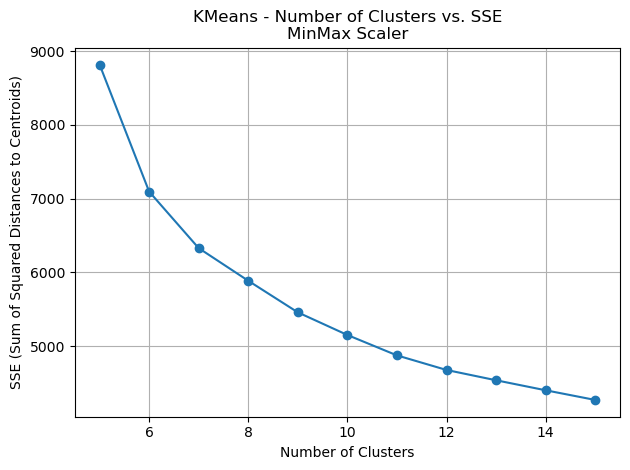

In [25]:
# Plot the cluster info
plt.plot(range(min_no_clusters, max_no_clusters + 1), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Distances to Centroids)')
plt.title('KMeans - Number of Clusters vs. SSE\nMinMax Scaler')
plt.tight_layout()
plt.grid()
plt.show()

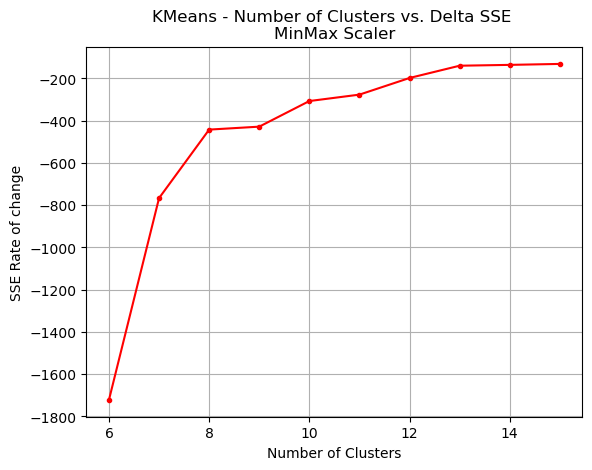

In [26]:
# Look at the numerical difference to simplify choice of optimal k
rate_of_change = np.diff(distortions)
plt.plot(range(min_no_clusters+1, max_no_clusters+1), rate_of_change, marker='.', color='r')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('SSE Rate of change')
plt.title('KMeans - Number of Clusters vs. Delta SSE \nMinMax Scaler')
plt.show()

In [31]:
optimal_k = 8
km = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

In [32]:
km.fit(X_used)

KMeans(n_init=10, random_state=0)

In [33]:
y_pred = km.predict(X_used)

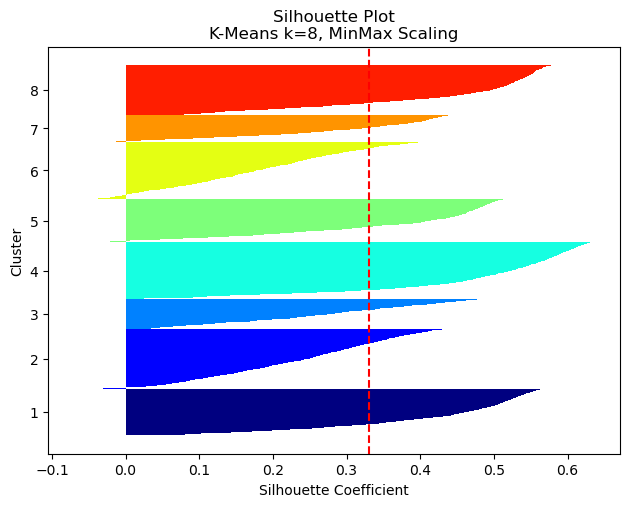

In [34]:
# Can take a few seconds to plot.
generate_silhouette_plot(X_used, y_pred, f'Silhouette Plot\nK-Means k={optimal_k}, MinMax Scaling')

In [35]:
df.iloc[5060]

image_name     video-JhYLiFCieHQHaY8o7-frame-005080-MNtYpt7jm...
class                                                        car
feature_0                                                0.33503
feature_1                                              -0.032729
feature_2                                               0.150543
                                     ...                        
feature_252                                            -1.405876
feature_253                                            -0.535049
feature_254                                             0.938109
feature_255                                             1.062499
class_index                                                    2
Name: 5060, Length: 259, dtype: object

Cluster #: 1


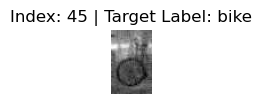

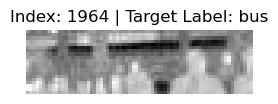

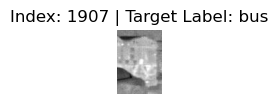

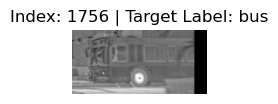

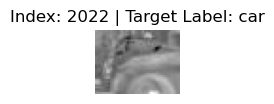

Cluster #: 2


<Figure size 640x480 with 0 Axes>

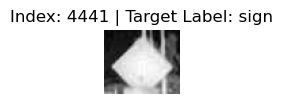

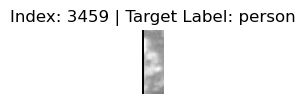

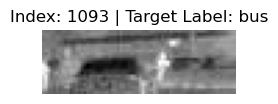

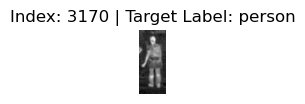

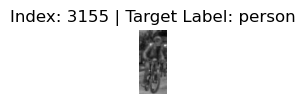

Cluster #: 3


<Figure size 640x480 with 0 Axes>

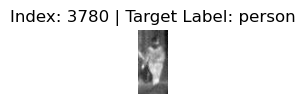

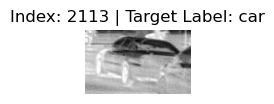

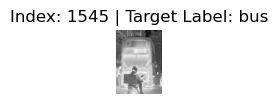

Image video-bk2x9u9JivsWRS9Nk-frame-010791-fThEWrYqH9FbsFq6t_168851.jpg not found in data/images\sign\video-bk2x9u9JivsWRS9Nk-frame-010791-fThEWrYqH9FbsFq6t_168851.jpg
something went wrong boss


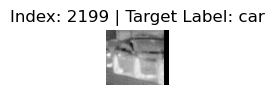

Cluster #: 4


<Figure size 640x480 with 0 Axes>

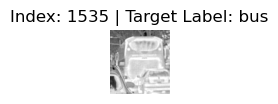

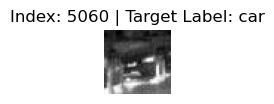

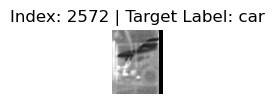

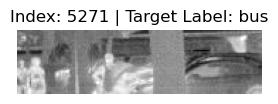

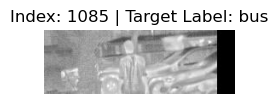

Cluster #: 5


<Figure size 640x480 with 0 Axes>

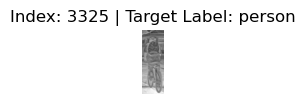

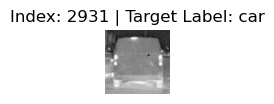

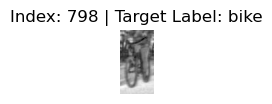

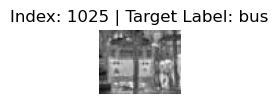

Image video-a9TgkAvMGtM2gXpdj-frame-002275-4Z54obMZgZLAETtYY_165439.jpg not found in data/images\sign\video-a9TgkAvMGtM2gXpdj-frame-002275-4Z54obMZgZLAETtYY_165439.jpg
something went wrong boss
Cluster #: 6


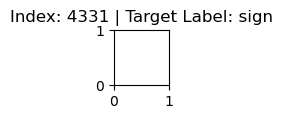

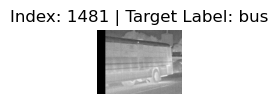

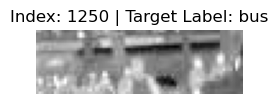

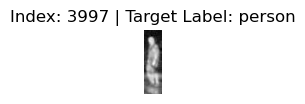

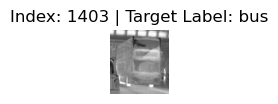

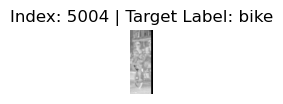

Cluster #: 7


<Figure size 640x480 with 0 Axes>

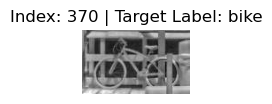

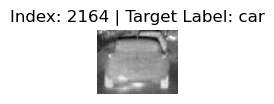

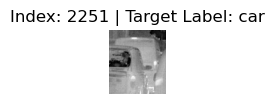

Image video-cprcATqPmWGnc3cgi-frame-001692-nBLNknca4xfpXHBTo_29234.jpg not found in data/images\sign\video-cprcATqPmWGnc3cgi-frame-001692-nBLNknca4xfpXHBTo_29234.jpg
something went wrong boss
Image video-nCxsLGvXK8o25AmXW-frame-005800-8aS6GPTnssoogZkNo_42656.jpg not found in data/images\sign\video-nCxsLGvXK8o25AmXW-frame-005800-8aS6GPTnssoogZkNo_42656.jpg
something went wrong boss
Cluster #: 8


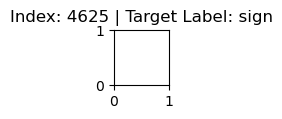

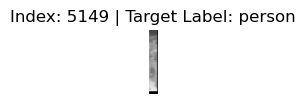

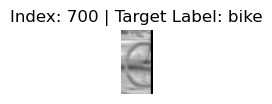

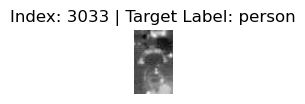

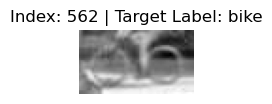

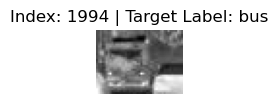

<Figure size 640x480 with 0 Axes>

In [36]:
for cluster in range(1, optimal_k + 1):
    center_idx, edge_idx = get_silhouette_info(X_used, y_pred, cluster)
    print("Cluster #:", cluster)
    plt.figure()
    plt.subplot(5, 1, 1)
    for targeted_idx in center_idx:
        idx_tried = 1
        try:
            plt.subplot(5, 1, idx_tried)
            # plt.figure()
            img = load_image(df.iloc[targeted_idx]['image_name'], df.iloc[targeted_idx]['class'])
            strang = "Index: " + str(targeted_idx) + " | Target Label: " + df.iloc[targeted_idx]['class']
            plt.title(strang)
            show_image(img)
        except:
            print("something went wrong boss")
        idx_tried += 1
        plt.tight_layout()

Cluster #: 1


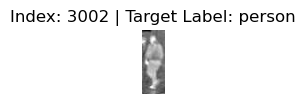

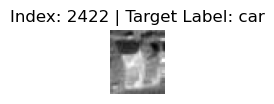

Cluster #: 2
Image video-5nvtKBPHiNQqpswFE-frame-007350-9fi5BxihEjrzHGmXs_79371.jpg not found in data/images\sign\video-5nvtKBPHiNQqpswFE-frame-007350-9fi5BxihEjrzHGmXs_79371.jpg
something went wrong boss


<Figure size 640x480 with 0 Axes>

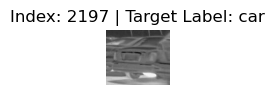

Cluster #: 3
Image video-GXXqNLCqyu72TLx5i-frame-001017-ykFLikqFqwi4Ku32y_130554.jpg not found in data/images\sign\video-GXXqNLCqyu72TLx5i-frame-001017-ykFLikqFqwi4Ku32y_130554.jpg
something went wrong boss


<Figure size 640x480 with 0 Axes>

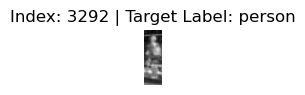

Cluster #: 4


<Figure size 640x480 with 0 Axes>

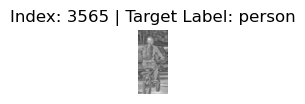

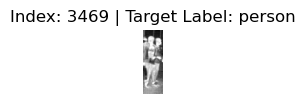

Cluster #: 5


<Figure size 640x480 with 0 Axes>

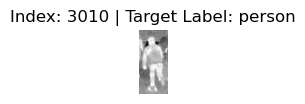

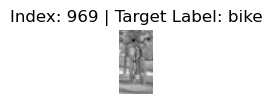

Cluster #: 6


<Figure size 640x480 with 0 Axes>

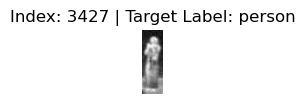

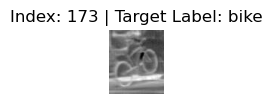

Cluster #: 7


<Figure size 640x480 with 0 Axes>

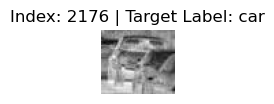

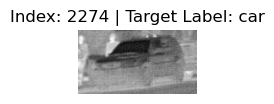

Cluster #: 8


<Figure size 640x480 with 0 Axes>

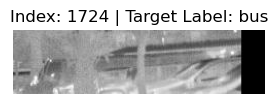

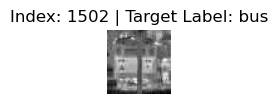

<Figure size 640x480 with 0 Axes>

In [37]:
for cluster in range(1, optimal_k + 1):
    center_idx, edge_idx = get_silhouette_info(X_used, y_pred, cluster)
    print("Cluster #:", cluster)
    plt.figure()
    plt.subplot(5, 1, 1)
    for targeted_idx in edge_idx:
        idx_tried = 1
        try:
            plt.subplot(5, 1, idx_tried)
            # plt.figure()
            img = load_image(df.iloc[targeted_idx]['image_name'], df.iloc[targeted_idx]['class'])
            strang = "Index: " + str(targeted_idx) + " | Target Label: " + df.iloc[targeted_idx]['class']
            plt.title(strang)
            show_image(img)
        except:
            print("something went wrong boss")
        idx_tried += 1
        plt.tight_layout()

# SVM Training

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import time
# Load data
df = load_data()

# Split data
X_train, X_test, y_train, y_test = split_data(df)
# Preview shape of split data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5335, 256) (5335,) (1334, 256) (1334,)


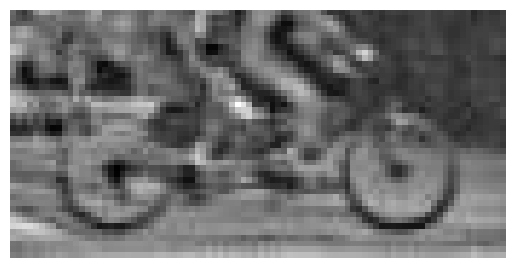

In [40]:
# Load an image by providing the image name and class (class name)
img = load_image(df.iloc[0]['image_name'], df.iloc[0]['class'])
# Show the image
show_image(img)

In [59]:
beg_time = time.time()
## Simple example of running an experiment
# Create a pipeline
pipe = make_pipeline(
    StandardScaler(),
    SVC(random_state=0, probability=True)
)
# Define parameters and options
param_grid = {
    'svc__C': [0.1, 1, 10], 'svc__kernel':['rbf'], 'svc__gamma':[0.00001, 0.001, 0.1],
}
# Get results for grid search with each of the 3 required scoring metrics (detailed progress updates with verbose=3)
results = validation_scores(pipe, param_grid, X_train, y_train, verbose=3)

# Take a look at the validation results
print('\nValidation results:')
print(results)
print("total time = ", time.time() - beg_time)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits

Validation results:
{'accuracy':     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
0       79.322999      6.274871         4.498863        0.749660         0.01   
1       13.657001      0.492901         0.370540        0.077309         0.01   
2      132.121620      9.328747         5.852238        1.343662         0.01   
3       13.278161      0.627217         0.227972        0.023625         0.01   
4      142.871525      7.718409         6.588286        0.783541         0.01   
5       15.011567      0.933050         0.350837        0.047414         0.01   
6       29.155380      3.871363         2.828481        0.573390          0.1   
7       16.838183      2.080544         0.370744        0.102356          0.1   
8      130.194189      8.244186         5.752333   

In [60]:
# Merge results into a unified dataframe (scorer will be new column)
mdf = merge_results(results)

# Save merged results to CSV file (all results -- all models * three scorers)
#mdf.to_csv('example_results.csv', index=False)

In [61]:
# Get top scoring for each scorer method
top_each = pd.concat([
    mdf[mdf['scorer']==scorer].sort_values(by='rank_test_score').head(3)
    for scorer in sorted(mdf['scorer'].unique())
], ignore_index=True)

# Save top 3 performing models for each scorers (9 total results, but likely fewer than 9 unique param options)
#top_each.to_csv('top_3_per_scorer.csv', index=False)

top_each

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,scorer
0,14.418716,0.869496,1.438896,0.227695,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.906297,0.895052,0.906297,0.911478,0.904781,0.006002,1,accuracy
1,13.657001,0.492901,0.370540,0.077309,0.01,0.001,linear,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.904798,0.895802,0.905547,0.908477,0.903656,0.004738,2,accuracy
2,13.278161,0.627217,0.227972,0.023625,0.01,1,linear,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.904798,0.895802,0.905547,0.908477,0.903656,0.004738,2,accuracy
3,15.076318,0.744220,1.378129,0.176299,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.906501,0.895499,0.906581,0.911690,0.905068,0.005911,1,f1_score
4,13.452260,1.798906,0.280658,0.044512,0.01,0.001,linear,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.904957,0.896110,0.905827,0.908675,0.903892,0.004699,2,f1_score
5,14.854955,0.859545,0.352983,0.056219,0.01,1,linear,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.904957,0.896110,0.905827,0.908675,0.903892,0.004699,2,f1_score
6,12.827953,0.849226,0.274142,0.026275,0.01,0.001,linear,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.987113,0.984211,0.987996,0.986739,0.986515,0.001406,1,roc_auc
7,14.307351,1.098109,0.401463,0.106803,0.01,1,linear,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.987113,0.984211,0.987996,0.986739,0.986515,0.001406,1,roc_auc
8,14.064422,0.210343,0.336288,0.058013,0.01,100,linear,"{'svc__C': 0.01, 'svc__gamma': 100, 'svc__kern...",0.987113,0.984211,0.987996,0.986739,0.986515,0.001406,1,roc_auc


In [62]:
# Choose best model param options (assume after review that it matches first row)
best_params = top_each.iloc[0]['params']
best_params

{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [63]:
# Show all 3 scores for best model params
best_model_scores = mdf[mdf['params']==best_params]

# Save all 3 results for best model (3x different scorer methods)
#best_model_scores.to_csv('best_model_params_and_scores.csv')

best_model_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,scorer
18,14.418716,0.869496,1.438896,0.227695,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.906297,0.895052,0.906297,0.911478,0.904781,0.006002,1,accuracy
48,13.459251,1.079727,1.439497,0.198263,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.985038,0.980571,0.984299,0.983504,0.983353,0.001695,10,roc_auc
78,15.076318,0.744220,1.378129,0.176299,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.906501,0.895499,0.906581,0.911690,0.905068,0.005911,1,f1_score
